 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [5875]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [5876]:
whale_data = Path("C:\\Users\\mfiaa\\Desktop\\FinTech Bootcamp\\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\\04-Pandas\\Unit 4 Homework\\Starter_Code\\Resources\\whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True) #read csv file in dataframe
whale_df.sort_index(ascending=True, inplace=True) #sort from past to present


In [5877]:
# Reading whale returns
whale_df.head() #display sample data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5878]:
# Count nulls
#whale_df.isnull().sum().sum() #counting total amount of null values
whale_df.isnull().sum() #counting where null values exist

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5879]:
# Drop nulls
whale_df = whale_df.dropna().copy() #dropping null values
whale_df.isnull().sum() #checking if null values exist still


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5880]:
# Reading algorithmic returns
# Same steps as whale returns
algo_data = Path("C:\\Users\\mfiaa\\Desktop\\FinTech Bootcamp\\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\\04-Pandas\\Unit 4 Homework\\Starter_Code\\Resources\\algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(ascending=True, inplace=True) 
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [5881]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [5882]:
# Drop nulls
algo_df = algo_df.dropna().copy() #dropping null values
algo_df.isnull().sum() #checking if null values exist still

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [5883]:
# Reading S&P TSX 60 Closing Prices
# same steps as whale and algo returns
tsx_data = Path("C:\\Users\\mfiaa\\Desktop\\FinTech Bootcamp\\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\\04-Pandas\\Unit 4 Homework\\Starter_Code\\Resources\\sp_tsx_history.csv")
tsx_df = pd.read_csv(tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsx_df.sort_index(ascending=True, inplace=True) 
tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [5884]:
# Check Data Types
tsx_df.dtypes #checking data types: object

Close    object
dtype: object

In [5885]:
# Fix Data Types
# must remove $ and , (str characters) to change data type to float
tsx_df["Close"] = tsx_df["Close"].str.replace("$", "") #remove dollar sign
tsx_df["Close"] = tsx_df["Close"].str.replace(",", "") #remove comma
tsx_df["Close"] = tsx_df["Close"].astype("float") #change data type
tsx_df.dtypes #check data type: float
#tsx_df.head()

c:\Users\mfiaa\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Close    float64
dtype: object

In [5886]:
# Calculate Daily Returns
tsx_daily_returns = tsx_df.pct_change() #calculate daily return
tsx_daily_returns.head() #display data

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [5887]:
# Drop nulls
tsx_daily_returns.isnull().sum().sum() #check for null values
tsx_daily_returns = tsx_daily_returns.dropna().copy() #drop null values
tsx_daily_returns.isnull().sum() #check for 0 null values

Close    0
dtype: int64

In [5888]:
# Rename `Close` Column to be specific to this portfolio.
tsx_daily_returns.columns = ["TSX"] #change close column for tsx df to make it stand out
tsx_daily_returns.head()

,TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [5889]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, tsx_daily_returns], axis="columns", join="inner") #combine the columns for the 3 df's into one combined df
combined_df.head() #display combined df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Daily Returns'}, xlabel='Date'>

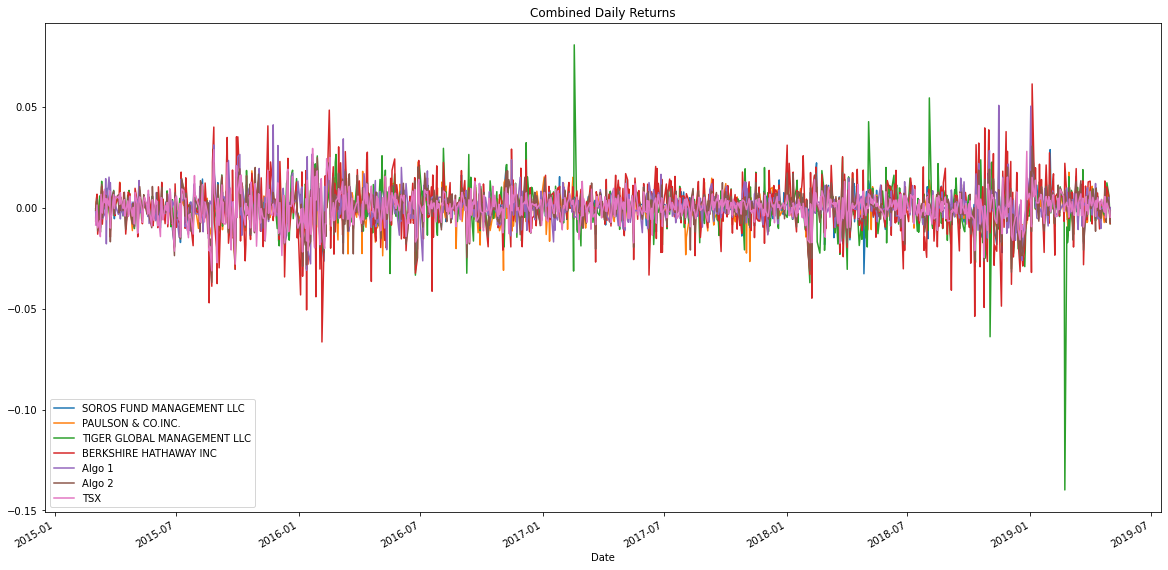

In [5890]:
# Plot daily returns of all portfolios
combined_df.plot(title="Combined Daily Returns", figsize=(20,10)) #plot

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Comparison of Performance'}, xlabel='Date'>

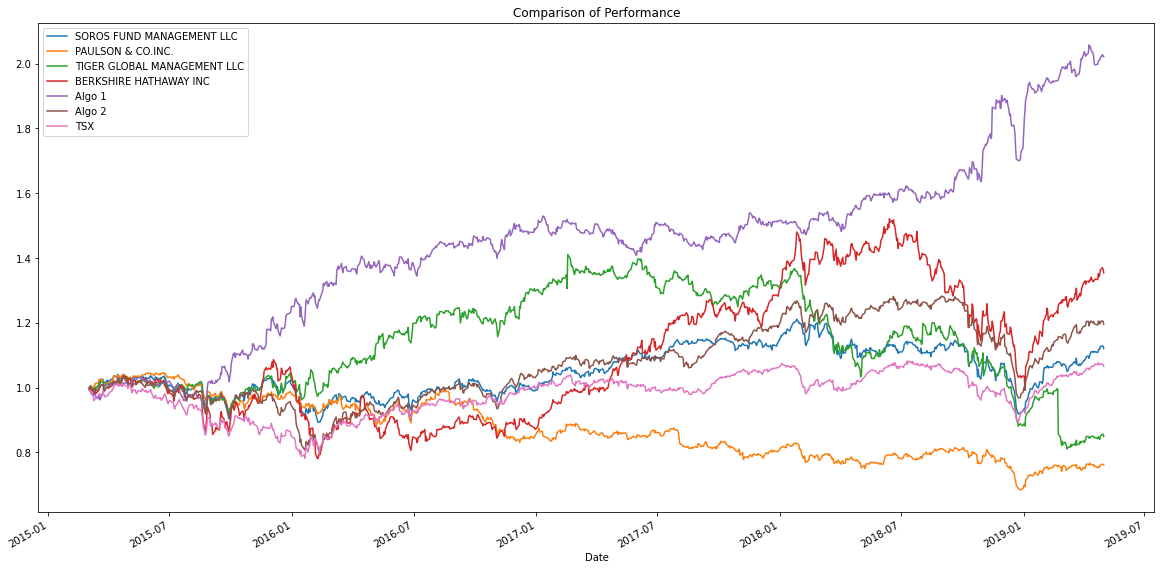

In [5891]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod() #cumprod to calculate cumulative performace
# Plot cumulative returns
cumulative_returns.plot(title="Comparison of Performance", figsize=(20,10)) #plot 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

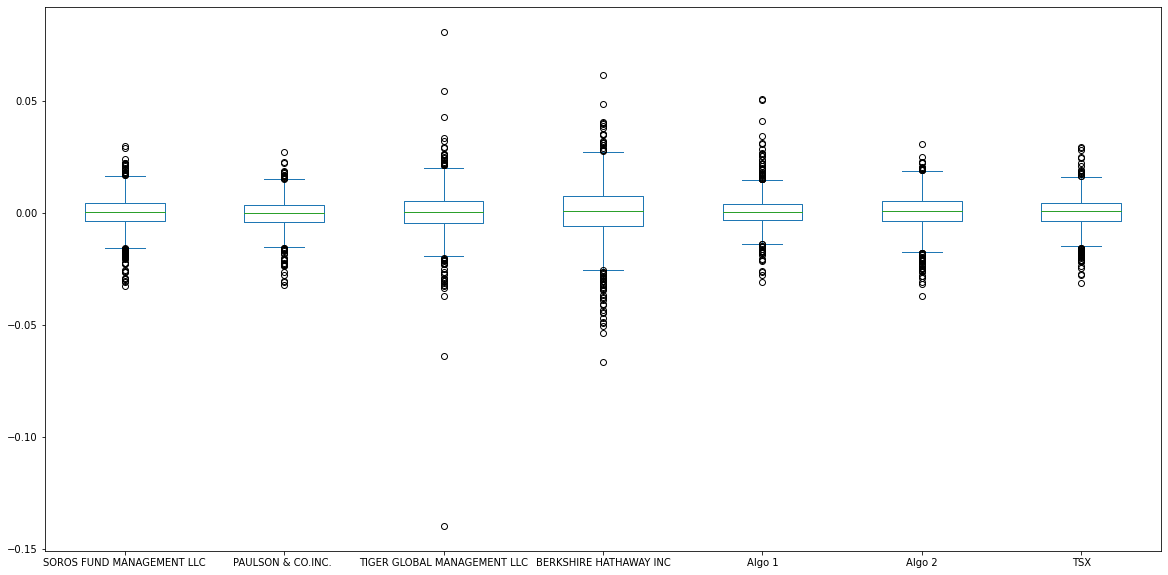

In [5892]:
# Box plot to visually show risk
combined_df.plot(kind='box', figsize=(20,10)) #plot type box

### Calculate Standard Deviations

In [5893]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"}) #std for all portfolios
combined_df_std #display portfolio deviations

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [5894]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_std = combined_df_std.loc["TSX", "std"] #isolate for TSX std
#tsx_std
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = combined_df_std[combined_df_std["std"] > tsx_std] #set dataframe for portfolios dev greater than tsx_std
higher_std #display riskier portfolios

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [5895]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual_std = combined_df.std()*np.sqrt(252)
combined_annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX                            0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Combined Standard Deviation vs Time'}, xlabel='Date'>

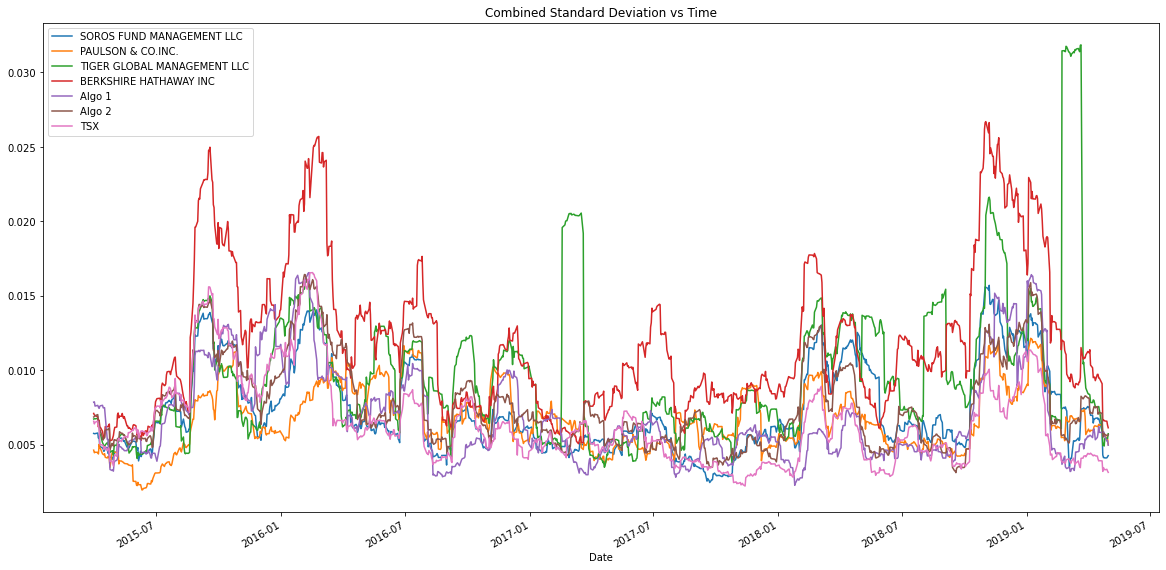

In [5896]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_sma_21 = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_sma_21.plot(title="Combined Standard Deviation vs Time", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

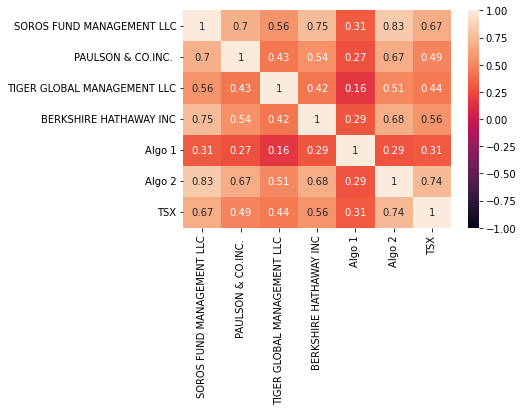

In [5897]:
# Calculate the correlation
correlation = combined_df.corr() #correlation function
# Display de correlation matrix
import seaborn as sns #import necessary library
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True) #show correlation via heatmap
#from heatmap, algo2 looks like the most correlated


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta for Algo 2 vs. TSX'}, xlabel='Date'>

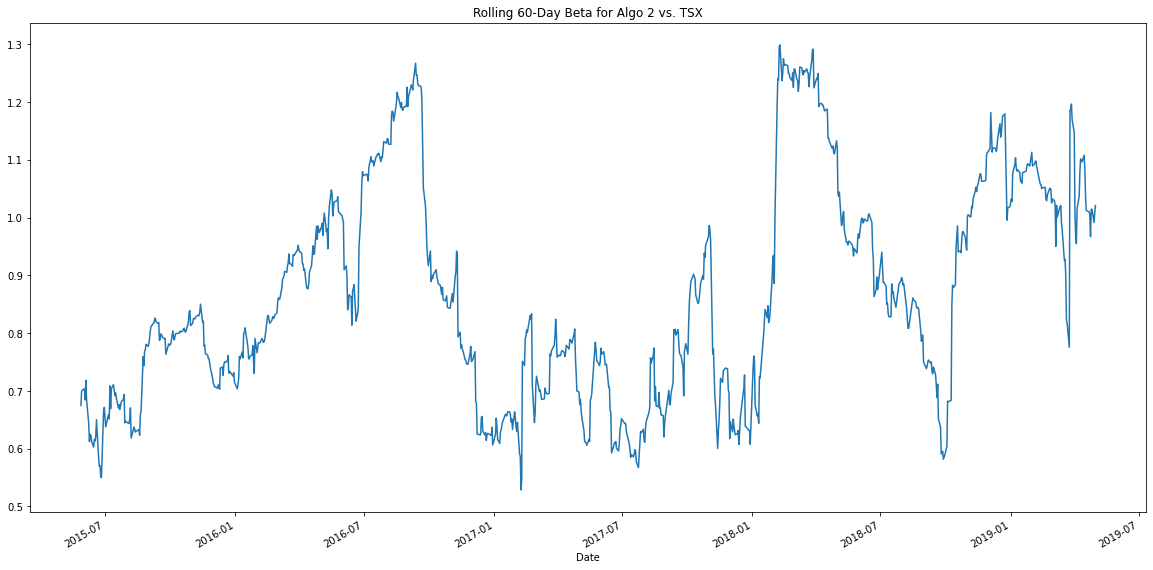

In [5898]:
# Calculate covariance of a single portfolio
covariance_algo2_tsx = combined_df['Algo 2'].rolling(window=60).cov(combined_df['TSX']) #covariance for algo2
# Calculate variance of S&P TSX
variance_tsx = combined_df["TSX"].rolling(window=60).var() #variance for TSX
# Computing beta
beta = covariance_algo2_tsx/variance_tsx #beta calcualtion
# Plot beta trend
beta.plot(title="Rolling 60-Day Beta for Algo 2 vs. TSX", figsize=(20,10)) #beta plot

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'21-Day EMA'}, xlabel='Date'>

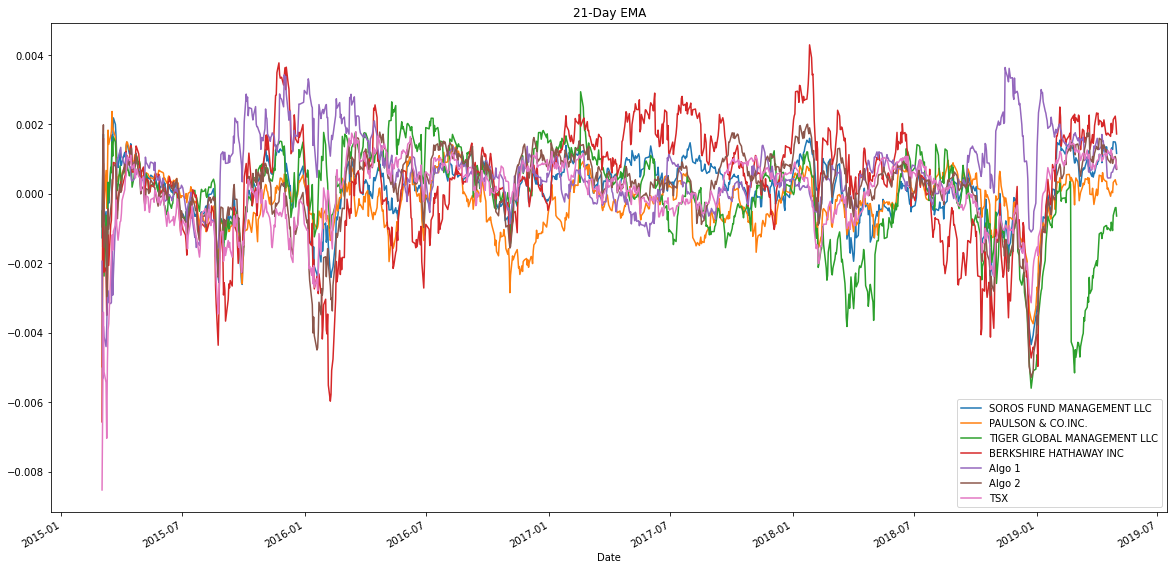

In [5899]:
# Use `ewm` to calculate the rolling window
rolling_ewa_21 = combined_df.ewm(halflife=21, adjust=True).mean() #adjust=True to give more weighting on recent dates
rolling_ewa_21.plot(title="21-Day EMA", figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [5900]:
# Annualized Sharpe Ratios
annual_combined_sharpe = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252)) #calcualte combined sharpe ratios
annual_combined_sharpe

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX                            0.195550
dtype: float64

<AxesSubplot:title={'center':'Combined Sharpe Ratios'}>

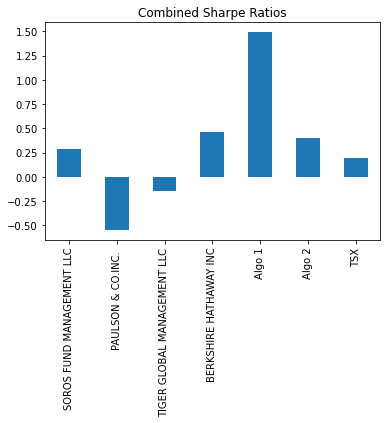

In [5901]:
# Visualize the sharpe ratios as a bar plot
annual_combined_sharpe.plot(kind="bar", title="Combined Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [5902]:
# Reading data from 1st stock
# AAPL from google finance
aapl_data = Path("C:\\Users\\mfiaa\\Desktop\\FinTech Bootcamp\\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\\04-Pandas\\Unit 4 Homework\\Starter_Code\\Resources\\aapl_google_finance.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Date", infer_datetime_format=True, parse_dates=True) #read into df
aapl_df.sort_index(ascending=True, inplace=True) #sort ascending
aapl_df.head() #display


,Close
Date,
2018-01-02 16:00:00,43.07
2018-01-03 16:00:00,43.06
2018-01-04 16:00:00,43.26
2018-01-05 16:00:00,43.75
2018-01-08 16:00:00,43.59


In [5903]:
# Reading data from 2nd stock
# goog from google finance
# same steps as aapl
goog_data = Path("C:\\Users\\mfiaa\\Desktop\\FinTech Bootcamp\\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\\04-Pandas\\Unit 4 Homework\\Starter_Code\\Resources\\goog_google_finance.csv")
goog_df = pd.read_csv(goog_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(ascending=True, inplace=True) 
goog_df.head()

,Close
Date,
2018-01-02 16:00:00,1065.00
2018-01-03 16:00:00,1082.48
2018-01-04 16:00:00,1086.40
2018-01-05 16:00:00,1102.23
2018-01-08 16:00:00,1106.94


In [5904]:
# Reading data from 3rd stock
# nvda from google finance
# same steps as aapl and fb
nvda_data = Path("C:\\Users\\mfiaa\\Desktop\\FinTech Bootcamp\\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\\04-Pandas\\Unit 4 Homework\\Starter_Code\\Resources\\nvda_google_finance.csv")
nvda_df = pd.read_csv(nvda_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda_df.sort_index(ascending=True, inplace=True) 
nvda_df.head()

,Close
Date,
2018-01-02 16:00:00,49.84
2018-01-03 16:00:00,53.12
2018-01-04 16:00:00,53.40
2018-01-05 16:00:00,53.85
2018-01-08 16:00:00,55.50


In [5905]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([aapl_df, goog_df, nvda_df], axis="columns", join="inner") #combining 3 stocks into one portfolio
my_portfolio.head() 

,Close,Close,Close
Date,,,
2018-01-02 16:00:00,43.07,1065.00,49.84
2018-01-03 16:00:00,43.06,1082.48,53.12
2018-01-04 16:00:00,43.26,1086.40,53.40
2018-01-05 16:00:00,43.75,1102.23,53.85
2018-01-08 16:00:00,43.59,1106.94,55.50


In [5906]:
# Reset Date index
my_portfolio.index = my_portfolio.index.normalize() #remove time from date index 


In [5907]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns = ["AAPL", "GOOG", "NVDA"] # labelled each separate stocks with their data
my_portfolio.head(10)

,AAPL,GOOG,NVDA
Date,,,
2018-01-02,43.07,1065.00,49.84
2018-01-03,43.06,1082.48,53.12
2018-01-04,43.26,1086.40,53.40
2018-01-05,43.75,1102.23,53.85
2018-01-08,43.59,1106.94,55.50
2018-01-09,43.58,1106.26,55.49
2018-01-10,43.57,1102.61,55.92
2018-01-11,43.82,1105.52,56.02
2018-01-12,44.27,1122.26,55.75


In [5908]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change() #changes closing price to daily return
# Drop NAs
my_portfolio_returns = my_portfolio_returns.dropna().copy() #drop null values
#my_portfolio_returns.isnull().sum().sum() #check for 0 null values
# Display sample data
my_portfolio_returns.head()

,AAPL,GOOG,NVDA
Date,,,
2018-01-03,-0.000232,0.016413,0.065811
2018-01-04,0.004645,0.003621,0.005271
2018-01-05,0.011327,0.014571,0.008427
2018-01-08,-0.003657,0.004273,0.030641
2018-01-09,-0.000229,-0.000614,-0.000180


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [5909]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
my_portfolio_returns = my_portfolio_returns.dot(weights).copy() #calculating total returns by combining the three stocks and their daily returns
# Display sample data
my_portfolio_returns = my_portfolio_returns.rename("My_Portfolio").copy() #renaming portfolio to distinguish between other portfolios
my_portfolio_returns



Date
2018-01-03    0.027331
2018-01-04    0.004512
2018-01-05    0.011442
2018-01-08    0.010419
2018-01-09   -0.000341
                ...   
2019-06-24   -0.000204
2019-06-25   -0.016439
2019-06-26    0.022381
2019-06-27    0.007051
2019-06-28    0.000490
Name: My_Portfolio, Length: 374, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

<AxesSubplot:title={'center':'Comparison of Performance'}, xlabel='Date'>

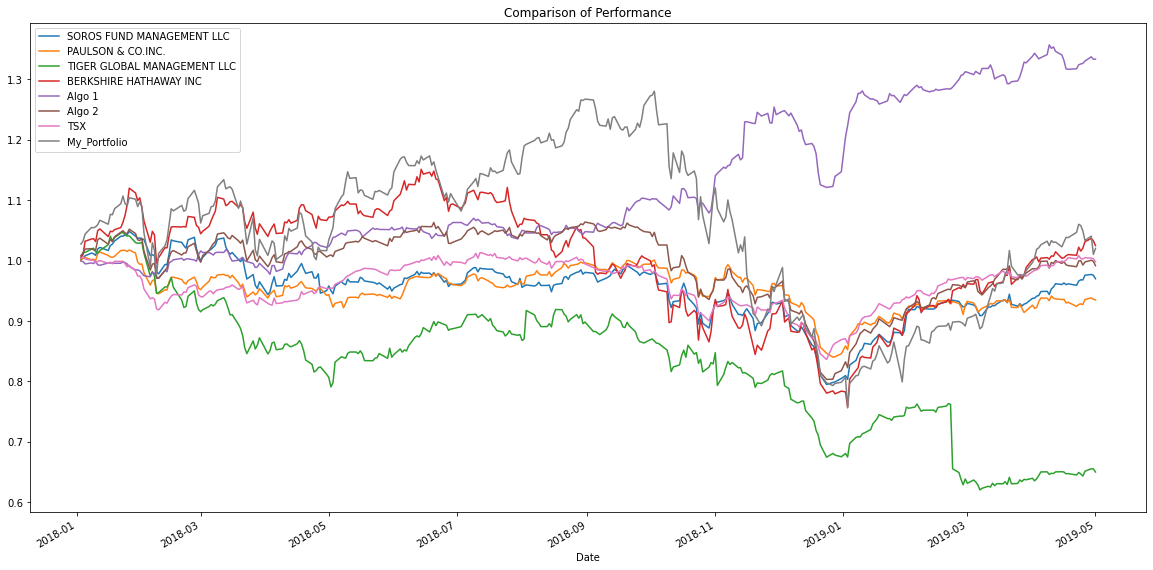

In [5910]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([combined_df, my_portfolio_returns], axis=1, join="inner") #combine my_portfolio to other portfolios
all_portfolios.head()
all_cumulative_returns = (1+all_portfolios).cumprod() #cumprod to calculate cumulative performace
all_cumulative_returns.plot(title="Comparison of Performance", figsize=(20,10)) #plot 


In [5911]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#all_portfolios.isnull().sum()
all_portfolios.isnull().sum().sum() #check if there are null values
#already 0


0

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [5912]:
# Calculate the annualized `std`
all_portfolios_std = all_portfolios.std()*np.sqrt(252)
all_portfolios_std.sort_values(ascending=True, inplace=True)
all_portfolios_std
#My_portfolio shows the highest risk with the highest standard deviation

TSX                            0.099121
PAULSON & CO.INC.              0.114343
Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
My_Portfolio                   0.297190
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'My Portfolio Rolling 21 STD'}, xlabel='Date'>

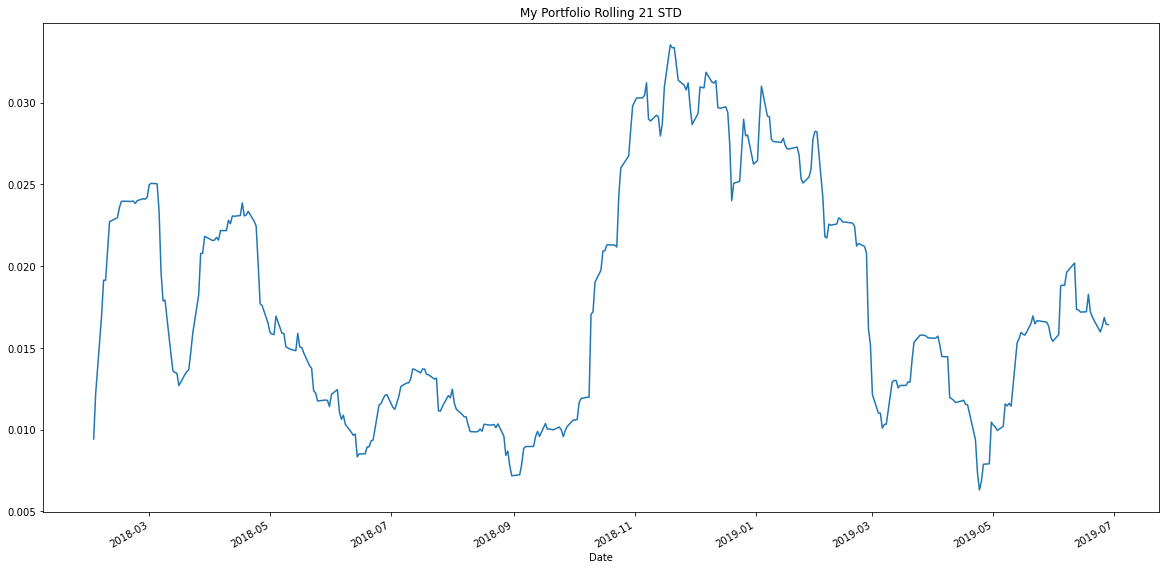

In [5913]:
# Calculate rolling standard deviation
my_portfolio_rolling_std = my_portfolio_returns.rolling(window=21).std()
all_portfolios_rolling_std = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
my_portfolio_rolling_std.plot(title="My Portfolio Rolling 21 STD", figsize=(20,10)) #didnt clarify to plot all portfolios or just my_portfolio

<AxesSubplot:title={'center':'All Porfolios Rolling 21 STD'}, xlabel='Date'>

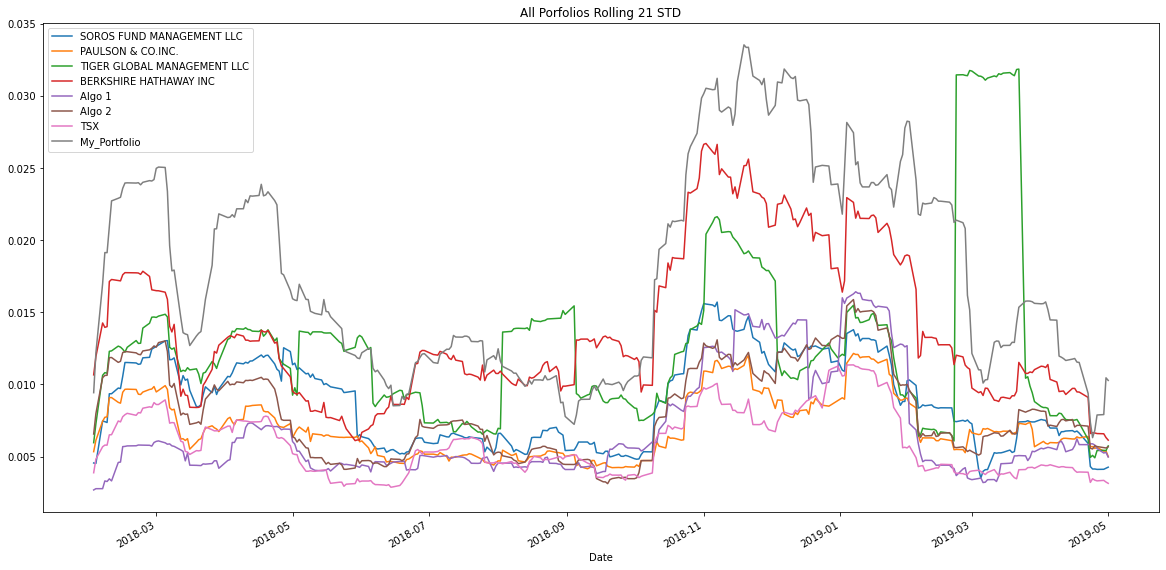

In [5914]:
all_portfolios_rolling_std.plot(title="All Porfolios Rolling 21 STD", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

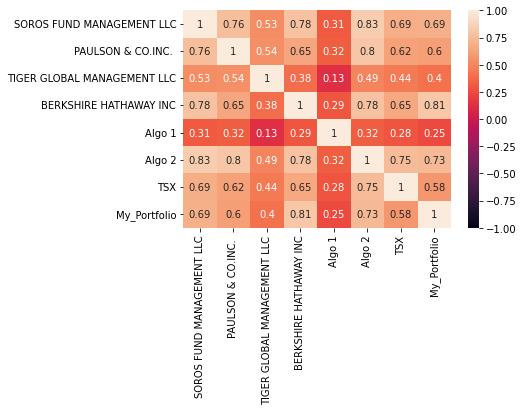

In [5915]:
# Calculate and plot the correlation
all_correlation = all_portfolios.corr()
sns.heatmap(all_correlation, vmin=-1, vmax=1, annot=True)
#my_portfolio is the 3rd least correlated with the TSX

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'My_Portfolio Rolling 60 Day Beta'}, xlabel='Date'>

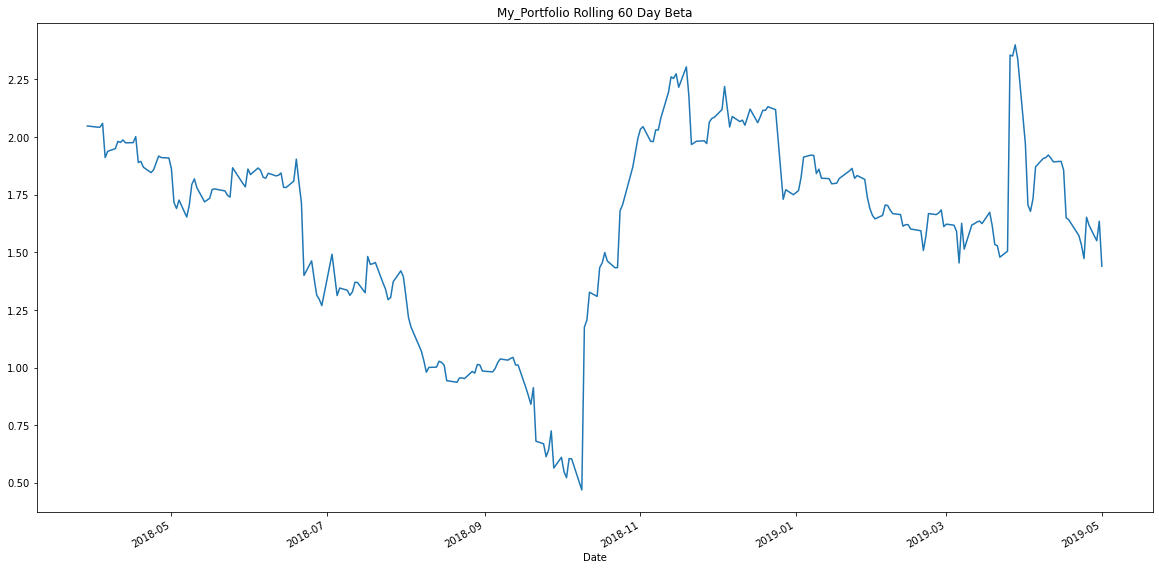

In [5916]:
# Calculate and plot Beta
my_rolling_covariance = all_portfolios["My_Portfolio"].rolling(window=60).cov(all_portfolios['TSX'])
#all_rolling_covariance = all_portfolios.rolling(window=60).cov(all_portfolios['TSX'])
tsx_rolling_variance = all_portfolios['TSX'].rolling(window=60).var()
rolling_60_beta = my_rolling_covariance/tsx_rolling_variance
#all_rolling_60_beta = all_rolling_covariance/tsx_rolling_variance
rolling_60_beta.plot(title="My_Portfolio Rolling 60 Day Beta", figsize=(20,10))
#all_rolling_60_beta.plot(title="Comparison of Rolling 60 Day Beta", fis)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [5917]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (all_portfolios.mean()*252)/(all_portfolios.std()*np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
TSX                            0.034651
My_Portfolio                   0.200653
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

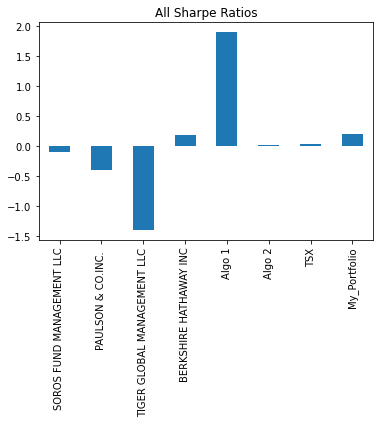

In [5918]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind='bar', title="All Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

My portfolio performed above average compared to the other funds.
Pros:
Provided high returns with better risk-adjusted performance. Cumulative returns analysis gave Comparison of Performance graph, which ranked 3rd in cumulative returns over that timespan. It is well correlated with TSX, ranking 3rd from the heat map. And, the sharpe ratio ranking 2nd, showing adversity in a risk-off environment.
Cons:
Although, it's the riskier and more volatile portfolio, ranking 1st in annualized standard deviation. This can be seen from the 21 simple moving average plot, ending the time frame at highest std as well. The portfolio also has a relatively high beta, ranging above 1.5 for beginning of 2018 and all of 2019. (With the average beta being 1.0)
Overall:
Good portfolio, small diversification, good correlation to indexes, and risk-adjusted performance.